Init time AVG: 0.00552 sec
AuthCom time AVG: 0.00052 sec
VfCom time AVG: 0.00009 sec
VfAuth time AVG: 0.00520 sec
RdmAC time AVG: 0.00037 sec
UpdAC time AVG: 0.00043 sec
VfUpd time AVG: 0.00514 sec


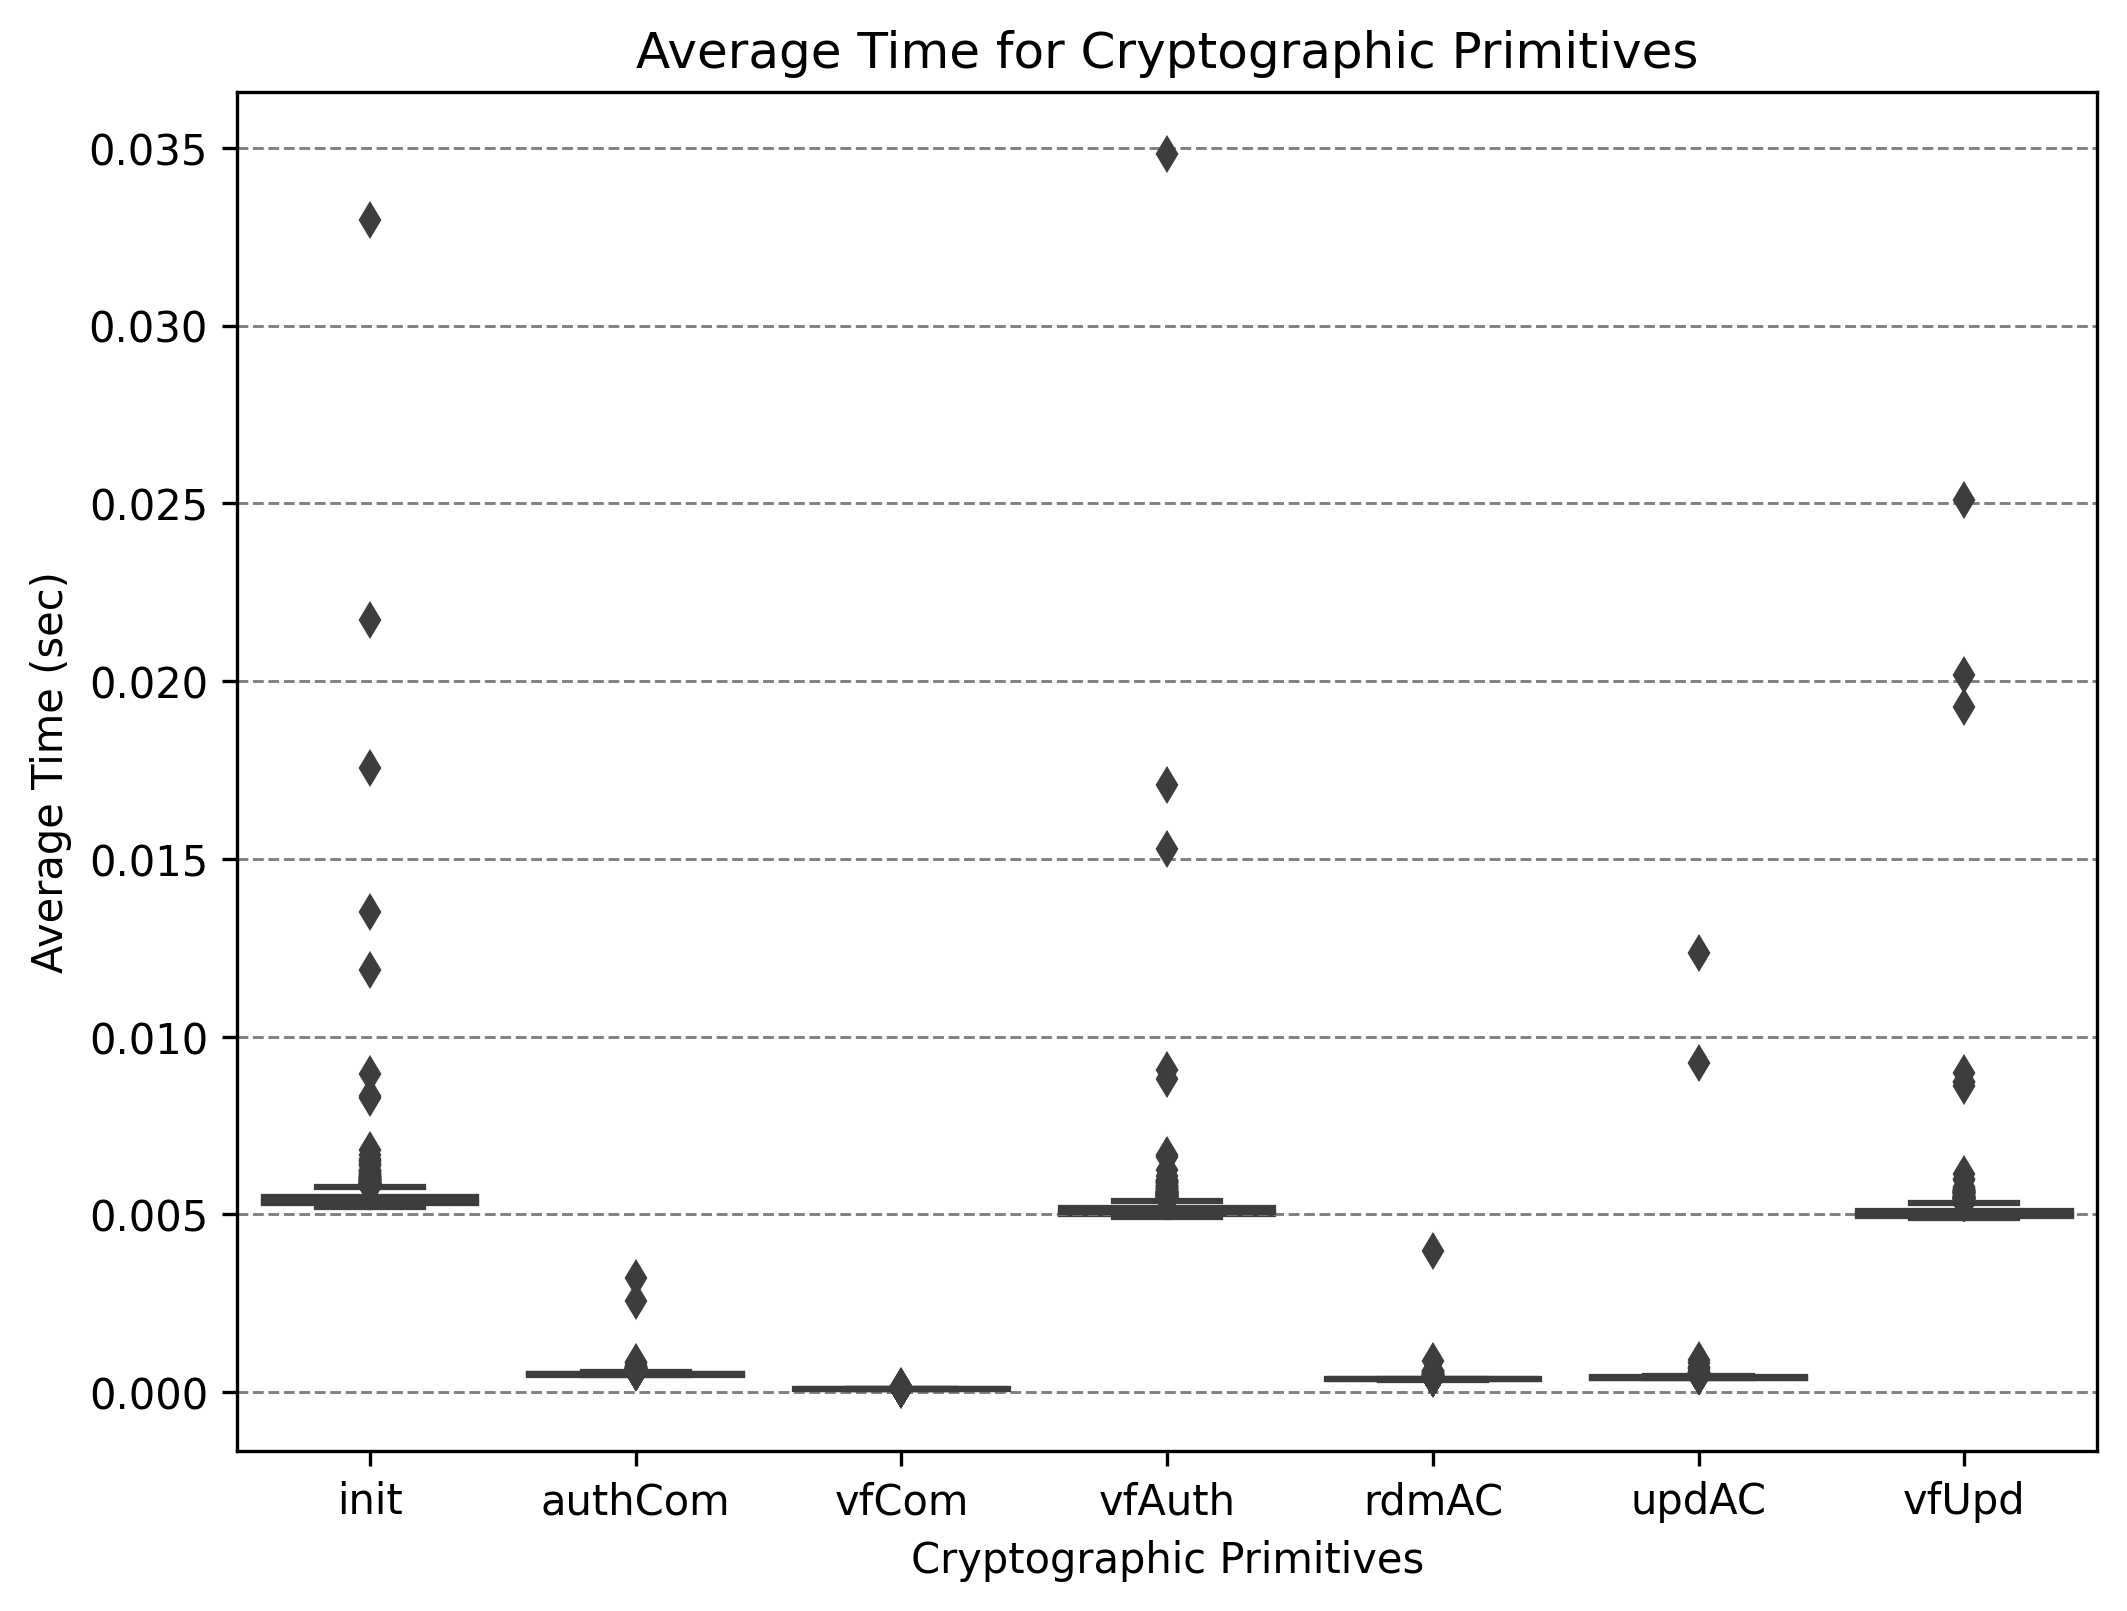

In [8]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

times = 80

# 初始化数组
init = np.zeros(times)
authCom = np.zeros(times)
vfCom = np.zeros(times)
vfAuth = np.zeros(times)
rdmAC = np.zeros(times)
updAC = np.zeros(times)
vfUpd = np.zeros(times)

# 循环获取数据
for i in range(times):
    res = subprocess.check_output('./main', shell=True)
    res = res.decode('utf-8')
    res_split = res.splitlines()

    init_time = eval(res_split[0][-11:-4])
    authCom_time = eval(res_split[2][-11:-4])
    vfCom_time = eval(res_split[4][-11:-4])
    vfAuth_time = eval(res_split[6][-11:-4])
    rdmAC_time = eval(res_split[8][-11:-4])
    updAC_time = eval(res_split[10][-11:-4])
    vfUpd_time = eval(res_split[12][-11:-4])

    init[i] = init_time
    authCom[i] = authCom_time
    vfCom[i] = vfCom_time
    vfAuth[i] = vfAuth_time
    rdmAC[i] = rdmAC_time
    updAC[i] = updAC_time
    vfUpd[i] = vfUpd_time

# 打印平均值
print("Init time AVG: {:.5f} sec".format(np.mean(init)))
print("AuthCom time AVG: {:.5f} sec".format(np.mean(authCom)))
print("VfCom time AVG: {:.5f} sec".format(np.mean(vfCom)))
print("VfAuth time AVG: {:.5f} sec".format(np.mean(vfAuth)))
print("RdmAC time AVG: {:.5f} sec".format(np.mean(rdmAC)))
print("UpdAC time AVG: {:.5f} sec".format(np.mean(updAC)))
print("VfUpd time AVG: {:.5f} sec".format(np.mean(vfUpd)))

# 创建数据字典
data = {
    'init': init,
    'authCom': authCom,
    'vfCom': vfCom,
    'vfAuth': vfAuth,
    'rdmAC': rdmAC,
    'updAC': updAC,
    'vfUpd': vfUpd
}

# 将数据转换为 DataFrame
df = pd.DataFrame(data)

# 绘制箱线图
plt.figure(figsize=(8, 6), dpi=300)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, zorder=0)
sns.boxplot(data=df)

# 设置标题和标签
plt.title('Average Time for Cryptographic Primitives')
plt.xlabel('Cryptographic Primitives')
plt.ylabel('Average Time (sec)')

# 保存图形
plt.savefig('result.png')

# 显示图形
plt.show()